## Introduction
* An airline is a company that provides air transport services for traveling passengers and freight.
* Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years and is now largely determined by computerized yield management systems.
* The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc.
* Recent advances in Artificial Intelligence (AI) and Machine Learning (ML) makes it possible to infer such rules and model the price variation.

In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Importing dataset
df = pd.read_csv('Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Droping the useless column 'Unnamed: 0'
df = df.drop('Unnamed: 0',axis=1)

In [5]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
# Size of the data 
df.shape

(300153, 11)

In [8]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

## Insights:
* Indigo becoming as a most popular Airline

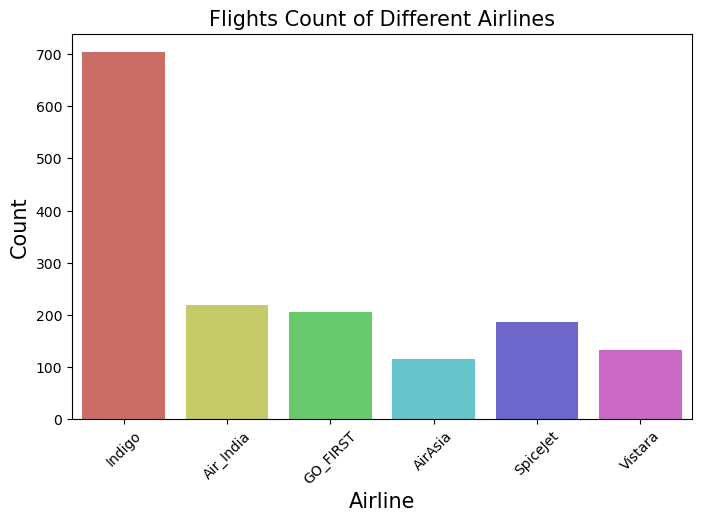

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='airline', data=df1, palette='hls')
plt.title('Flights Count of Different Airlines', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [10]:
# counting the unique flights per class and airline.
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

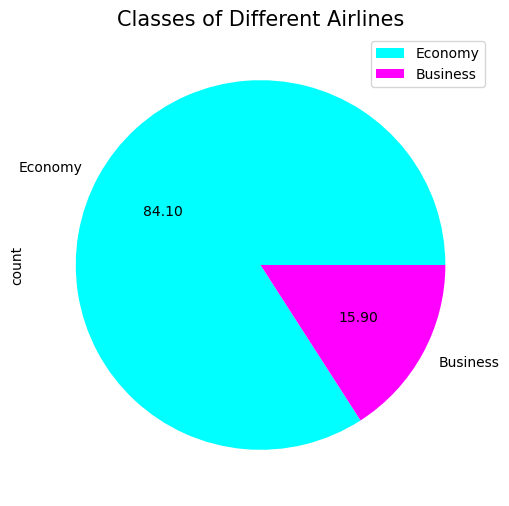

In [11]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

## Insights:
* Most of the Airlines has Economic Class as common

## Does price vary with Airlines?

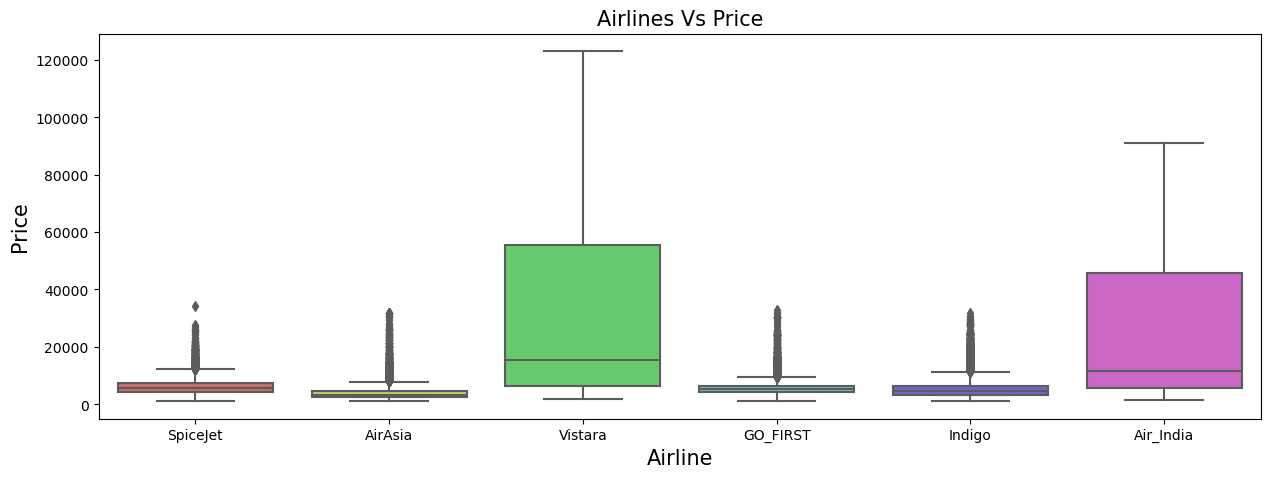

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Insights:
* Vistara has Maximum Price range
* Vistara and Air_India Airlines Have Maximum Price when compared to Others
* SpiceJet , AirAsia , GO_First and Indigo has some what equal prices
* Order based on higher price: Vistara > Air India > (Spice Jet > Go First > Indigo > AirAsia)

## How Does the Ticket Price vary between Economy and Business Class?

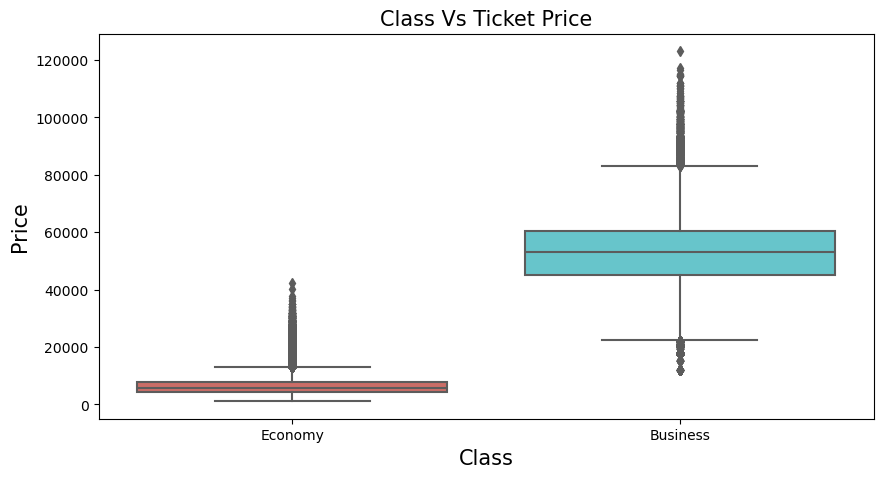

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Insights:
* Ticket Price is Maximum for Bussiness Class When compared to Economy Class

## How Does the Ticket Price vary with the number of stops of a Flight?

Text(0, 0.5, 'Price')

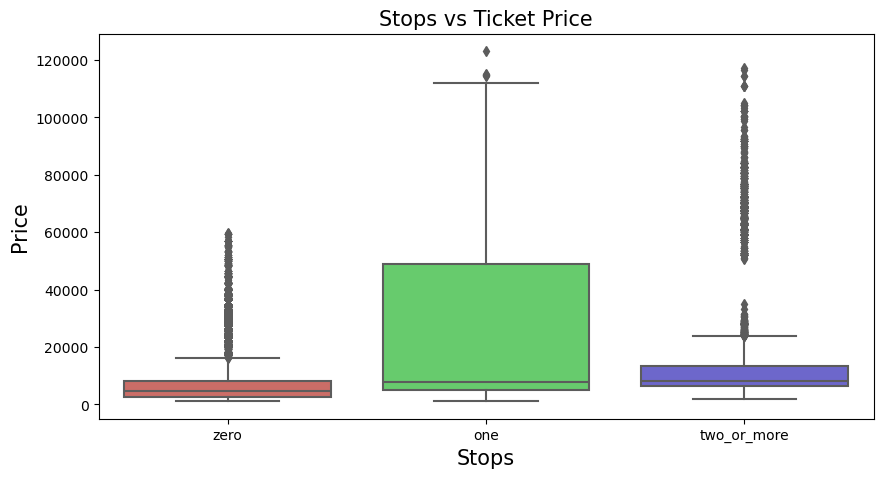

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title("Stops vs Ticket Price",fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)

## Insights:
* Flights having one stop has maximum ticket price.
* Order based on higher prices : One stop > Two or More stops > Zero Stop

## How the Ticket Price changes based on the Departure Time?

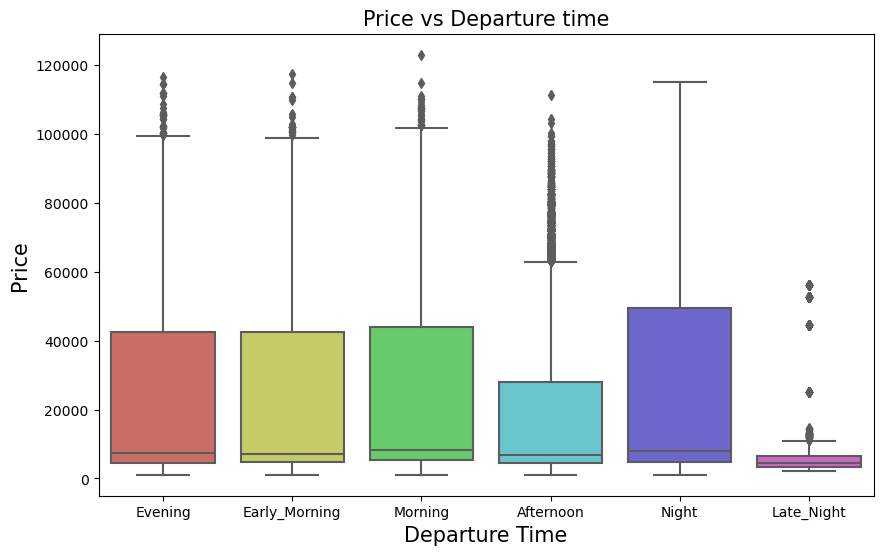

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='departure_time',y='price',data=df,palette='hls')
plt.title('Price vs Departure time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Insights:
* Ticket prices are highest for Depature time 'Night'
* Ticket prices are approximately same for departure time 'Evening','Early_Morning' and 'Morning'
* Ticket prices are least for departure time 'Late_Night'
* Order based on highest price: Night > Morning > (Evening > Early_Morning) > Afternoon > Late Night

## How the Ticket Price changes based on the Arrival Time?

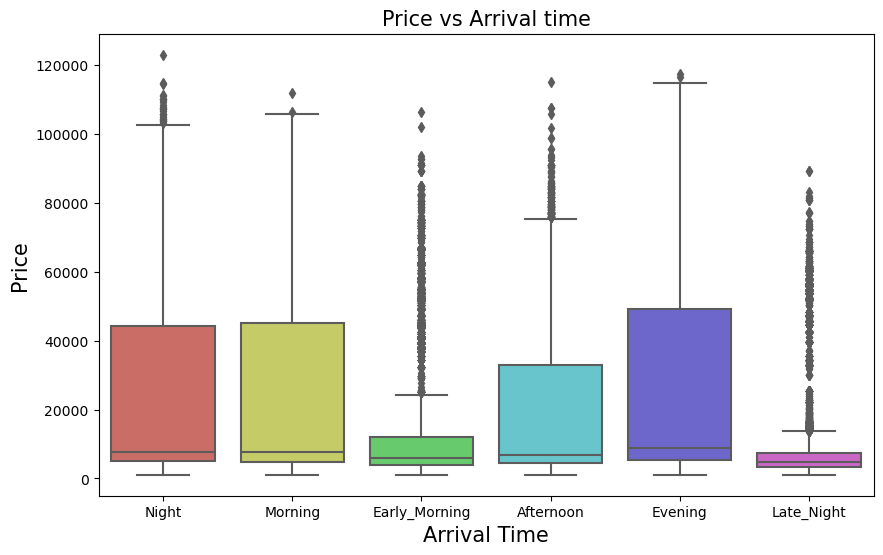

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Price vs Arrival time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Insights:
* Ticket Price is More for the Flights when the Arrival Time is at Evening* 
Ticket Price is almost equal for flights Having Arrival time is at Morning and Nigt
* Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time
* Order based on highest price : Evening > (Morning > Night) > Afternoon > Early Morning > Late Nightme

## How the price changes with change in Source city?

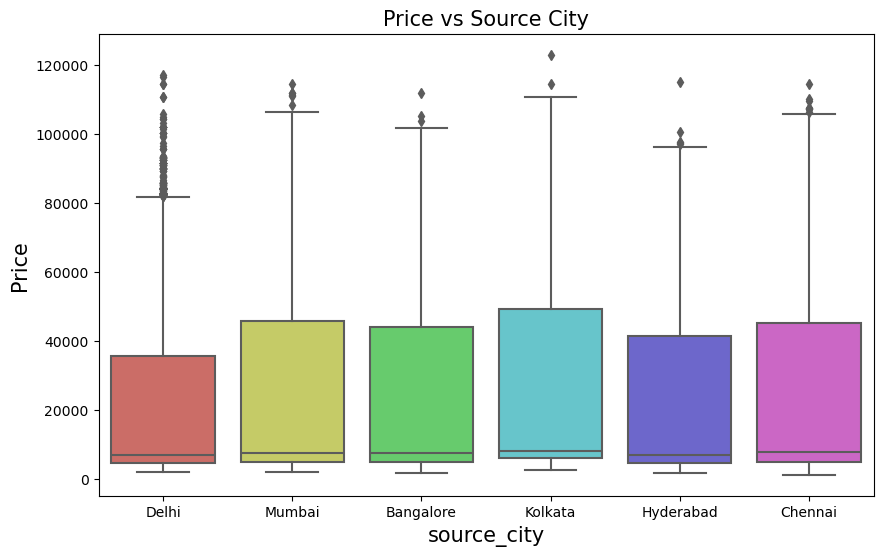

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='source_city',y='price',data=df,palette='hls')
plt.title('Price vs Source City',fontsize=15)
plt.xlabel('source_city',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Insights:
* Ticket Price is More for the Flights whose Source City is Kolkata
* Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai,Hyderabad and Bangalore
* Ticket Price is Low for the Flights Having Source City as Delhi
* Median tickets of all cities are almost same
* Order based on highest price : Kolkata > (Mumbai > Chennai) > Banglore > Hydrabad > Delhi

## How the price changes with change in Destination city?

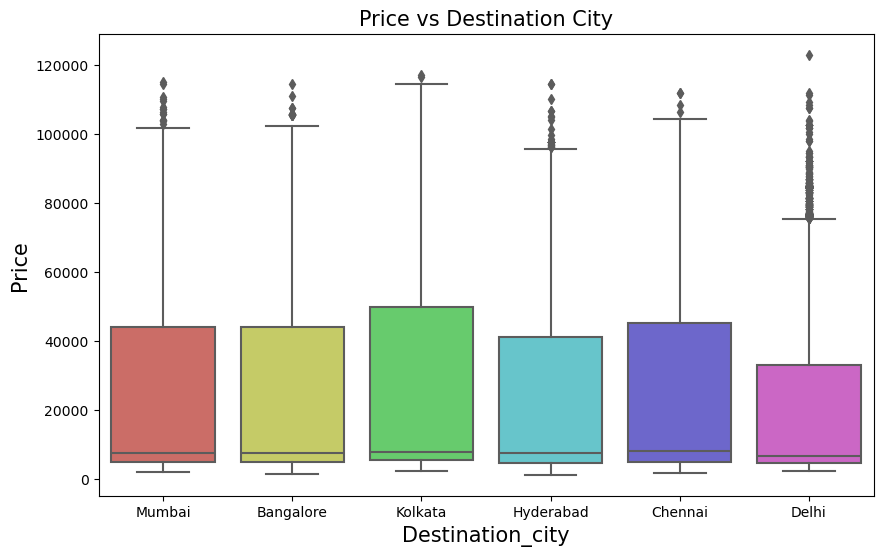

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Price vs Destination City',fontsize=15)
plt.xlabel('Destination_city',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Insights:
* Ticket Price is More for the Flights whose Destination City is kolkata and Chennai* 
Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalre
* Ticket Price is Low for the Flights Having Destination City as Delhi
* Order based on highest price : Kolkata > (Chennai > Mumbai > Banglore) > Hydrabad > Delhihi

## How Price Varies with the Flight Duration Based on Class?

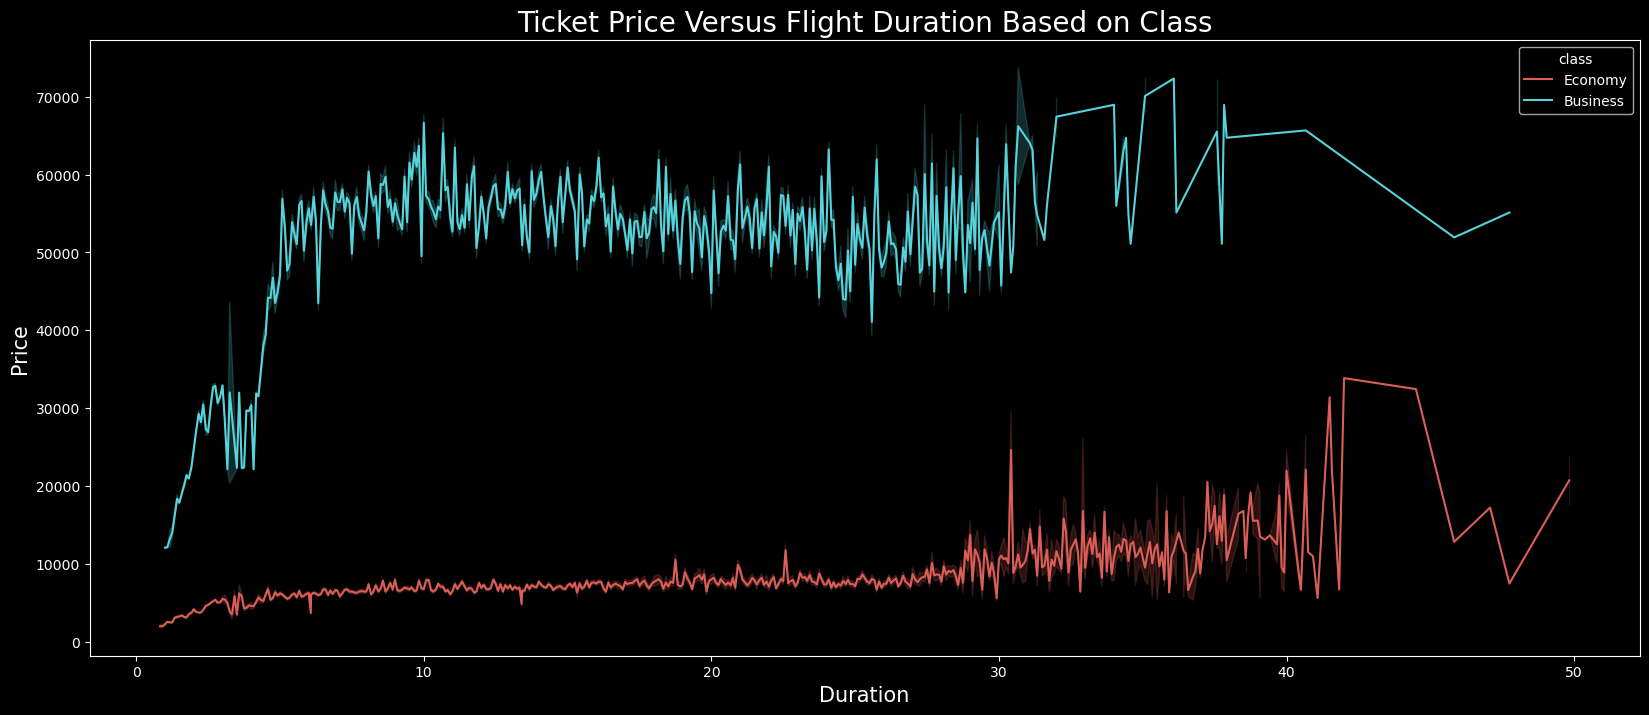

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Insights:
* With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes

## How does the price affected on the days left for Departure?

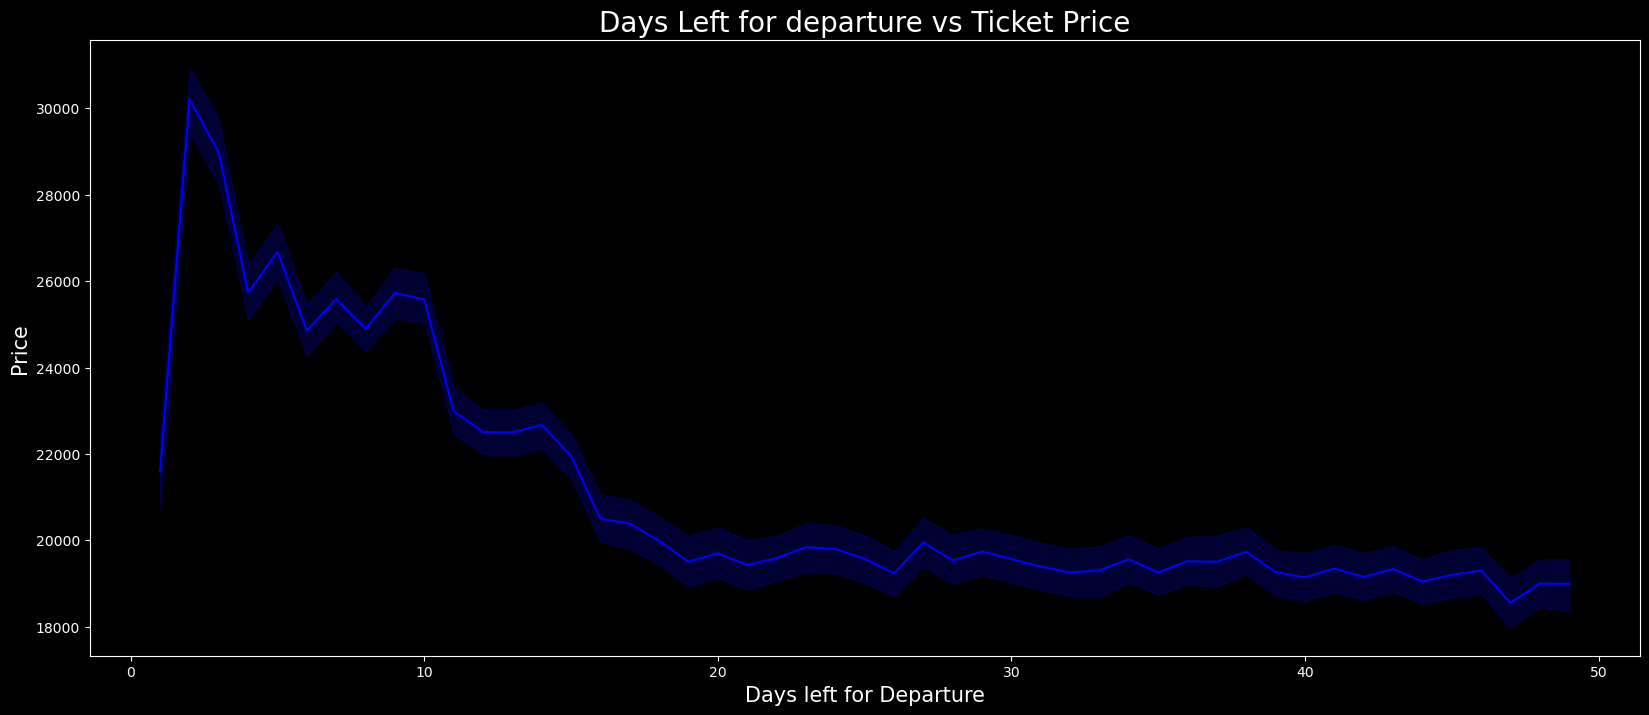

In [20]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left for departure vs Ticket Price',fontsize=20)
plt.xlabel('Days left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

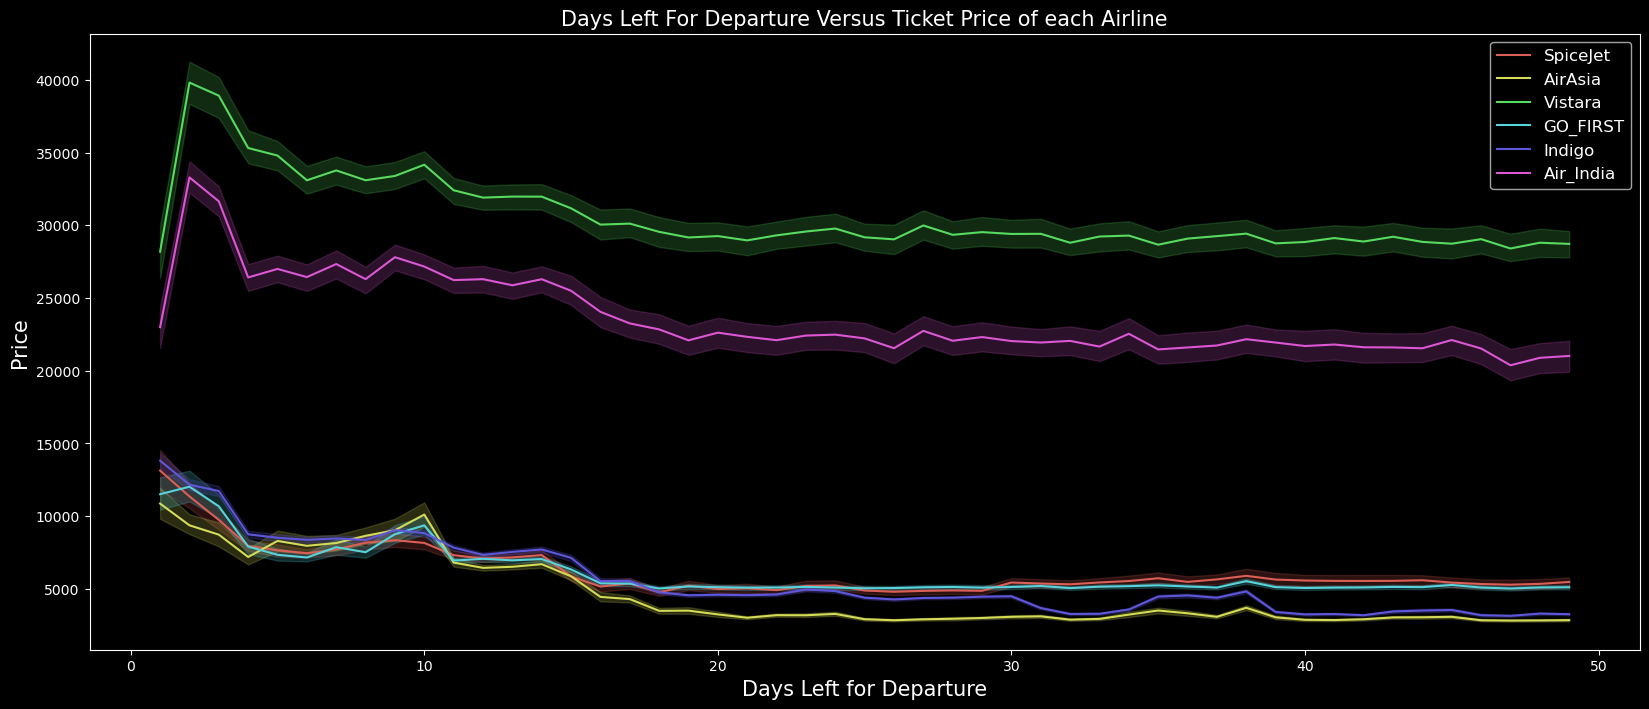

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Insights:
* when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines

## Total number of Flights from one city to another

In [22]:
# Group by the specified columns and count the occurrences
df_grouped = df.groupby(['flight', 'source_city', 'destination_city', 'airline', 'class'], as_index=False).count()

# Group by source_city and destination_city, and count the unique flights
df_flight_counts = df_grouped.groupby(['source_city', 'destination_city'], as_index=False)['flight'].count()

# Sort by flight count in descending order
df_flight_counts_sorted = df_flight_counts.sort_values(by='flight', ascending=False)

top_10_flights = df_flight_counts_sorted.head(10)
top_10_flights

,source_city,destination_city,flight
14,Delhi,Mumbai,364
10,Delhi,Bangalore,310
13,Delhi,Kolkata,306
27,Mumbai,Delhi,282
11,Delhi,Chennai,258
29,Mumbai,Kolkata,240
25,Mumbai,Bangalore,228
1,Bangalore,Delhi,227
12,Delhi,Hyderabad,224
22,Kolkata,Delhi,185


# Insights:
* Delhi to Mumbai having highest number of flights available

In [23]:
# Creating a Back up File
df_bk=df.copy()

In [24]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

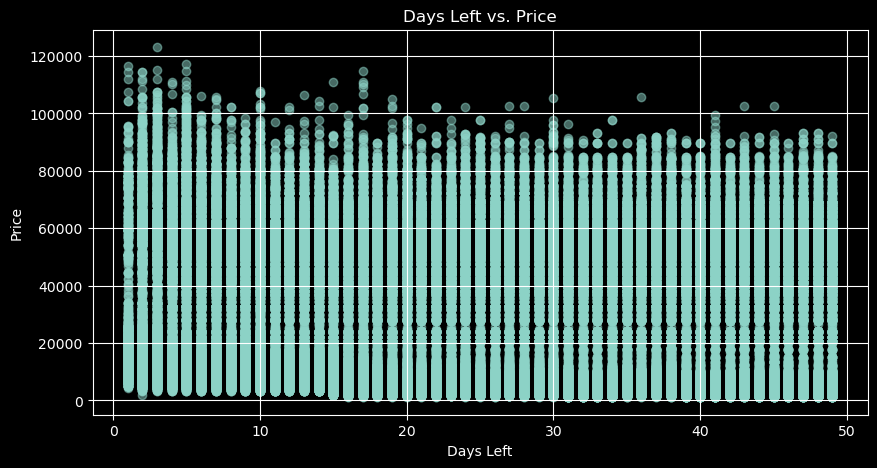

In [25]:
# Scatter plot for days_left vs. price
plt.figure(figsize=(10, 5))
plt.scatter(df['days_left'], df['price'], alpha=0.5)
plt.title('Days Left vs. Price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.grid(True)
plt.show()

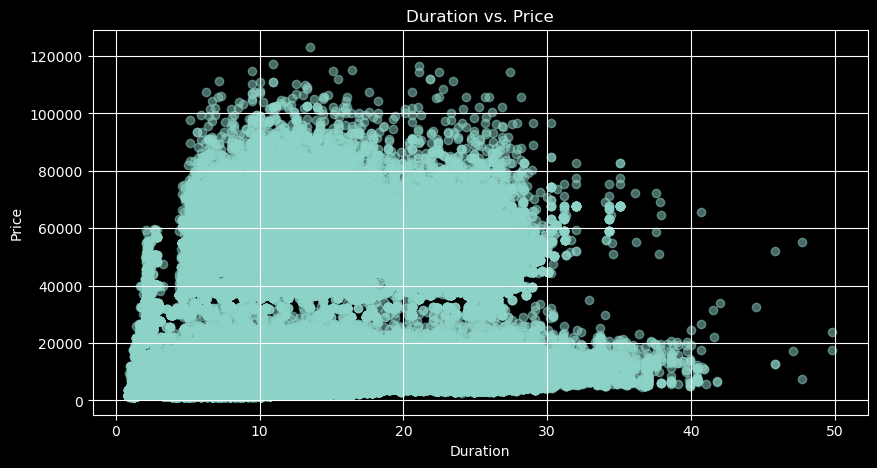

In [26]:
# Scatter plot for duration vs. price
plt.figure(figsize=(10, 5))
plt.scatter(df['duration'], df['price'], alpha=0.5)
plt.title('Duration vs. Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.grid(True)
plt.show()

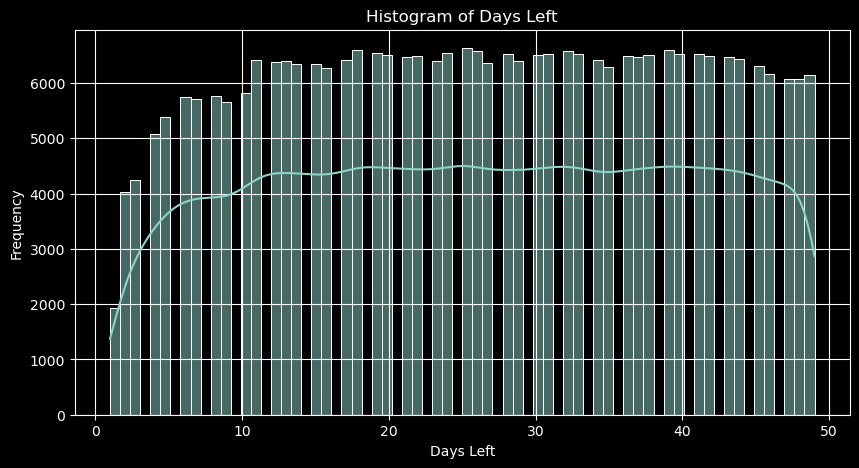

In [27]:
# Histogram for days_left
plt.figure(figsize=(10, 5))
sns.histplot(df['days_left'], kde=True)
plt.title('Histogram of Days Left')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

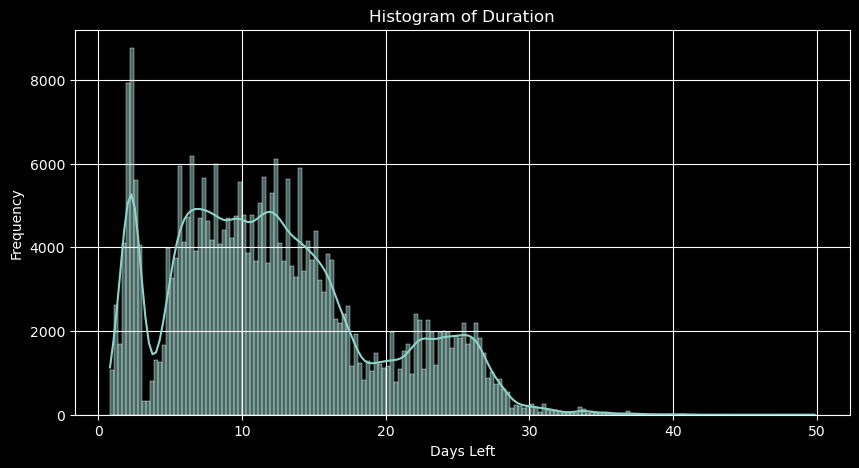

In [28]:
# Histogram for days_left
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], kde=True)
plt.title('Histogram of Duration')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
from scipy.stats import boxcox

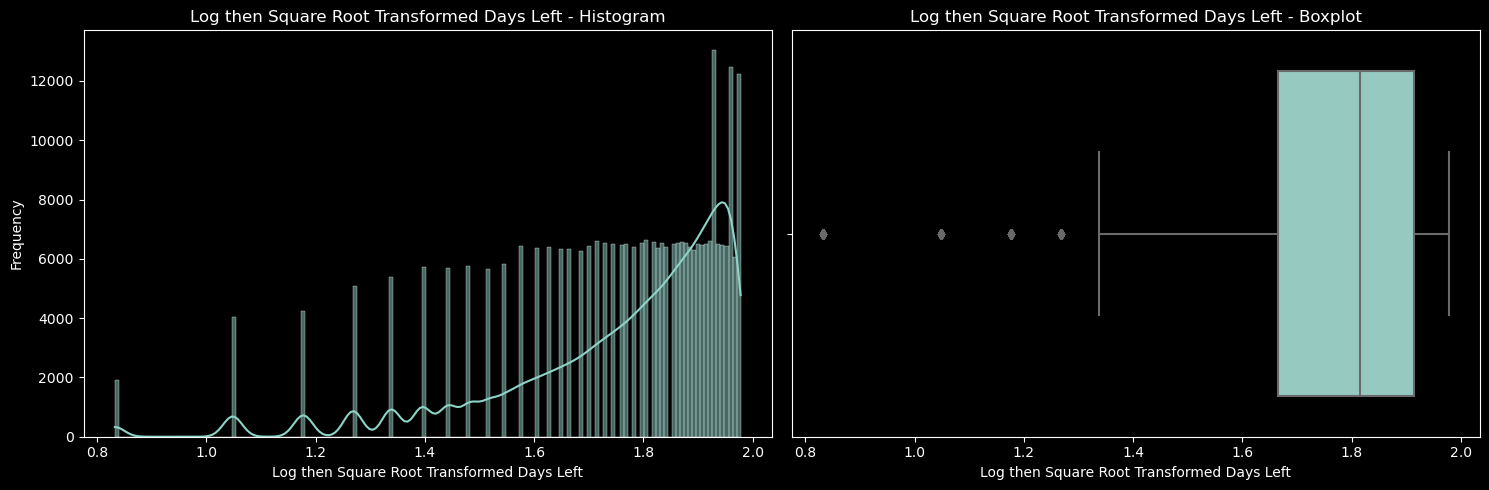

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transform
#df['days_left_log'] = np.log1p(df['days_left'])  # Using log1p to handle zero values

from sklearn.preprocessing import FunctionTransformer
tr=FunctionTransformer(func=np.log1p)
df['days_left_log_sqrt']=tr.fit_transform(df['days_left'])
# Apply square root transform to the log-transformed data
df['days_left_log_sqrt'] = np.sqrt(df['days_left_log'])

# Plotting the transformed distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of the log then square root transformed data
sns.histplot(df['days_left_log_sqrt'], kde=True, ax=axs[0])
axs[0].set_title('Log then Square Root Transformed Days Left - Histogram')
axs[0].set_xlabel('Log then Square Root Transformed Days Left')
axs[0].set_ylabel('Frequency')

# Boxplot of the log then square root transformed data
sns.boxplot(x=df['days_left_log_sqrt'], ax=axs[1])
axs[1].set_title('Log then Square Root Transformed Days Left - Boxplot')
axs[1].set_xlabel('Log then Square Root Transformed Days Left')

plt.tight_layout()
plt.show()
